<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Machine Learning - Project 2</center></h1>

# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Installing necessary libraries

In [1]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Install mlxtend
!pip install -q mlxtend

## Importing necessary libraries

In [3]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import iplot

# Import libraries for data processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Import libraries for data modeling
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Import libraries for model evaluations
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
import scipy.stats as stats

# Sequential Feature Selector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

## Loading the dataset

In [4]:
# Run the following lines for Google Colab to mount your Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read the data
df = pd.read_csv('/content/drive/My Drive/Machine_Learning/Loan_Modelling.csv')

# Return the first 5 rows
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Copy data to another variable to avoid any changes to original dataset
data = df.copy()

## Data Overview

* Observations
* Sanity checks

In [7]:
# Get a general overview of the dataset
data_overview = {
    'Number of Rows': data.shape[0],
    'Number of Columns': data.shape[1],
    'Column Names': list(data.columns),
    'Missing Values': data.isnull().sum().to_dict(),
    'Data Types': data.dtypes.to_dict()
}

data_overview

{'Number of Rows': 5000,
 'Number of Columns': 14,
 'Column Names': ['ID',
  'Age',
  'Experience',
  'Income',
  'ZIPCode',
  'Family',
  'CCAvg',
  'Education',
  'Mortgage',
  'Personal_Loan',
  'Securities_Account',
  'CD_Account',
  'Online',
  'CreditCard'],
 'Missing Values': {'ID': 0,
  'Age': 0,
  'Experience': 0,
  'Income': 0,
  'ZIPCode': 0,
  'Family': 0,
  'CCAvg': 0,
  'Education': 0,
  'Mortgage': 0,
  'Personal_Loan': 0,
  'Securities_Account': 0,
  'CD_Account': 0,
  'Online': 0,
  'CreditCard': 0},
 'Data Types': {'ID': dtype('int64'),
  'Age': dtype('int64'),
  'Experience': dtype('int64'),
  'Income': dtype('int64'),
  'ZIPCode': dtype('int64'),
  'Family': dtype('int64'),
  'CCAvg': dtype('float64'),
  'Education': dtype('int64'),
  'Mortgage': dtype('int64'),
  'Personal_Loan': dtype('int64'),
  'Securities_Account': dtype('int64'),
  'CD_Account': dtype('int64'),
  'Online': dtype('int64'),
  'CreditCard': dtype('int64')}}

In [8]:
# Print a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observations:

*   Among the 14 columns in the dataset, 13 have integer data types, while only the "CCAvg" column contains floating-point values.

In [9]:
# Check if there's missing value
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

#### Observations:

*   There are no missing values in any of the columns, which is a good sign indicating that the dataset is clean in terms of null values.

In [10]:
# Check if there's duplicated record
data.duplicated().sum()

0

#### Observations:

*   There are no duplicate rows in the dataset, indicating that each row represents a unique entry.

In [11]:
# Check the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Observations:

*   The dataset contains negative values (-3) for professional experience, which is unrealistic. This requires investigation to determine the appropriate corrective action.
*   The large difference between the 75th percentile and the maximum value, along with the mean being greater than the median, confirms the presence of outliers with high mortgage values.
*   The majority of customers have a mortgage value of zero, indicating that they do not have a mortgage.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [12]:
# Exploratory Data Analysis (EDA)

# Descriptive statistics of the dataset
desc_stats = data.describe()

# Correlation matrix to understand the relationship between variables
corr_matrix = data.corr()

# Distribution of the target variable 'Personal_Loan'
target_dist = data['Personal_Loan'].value_counts(normalize=True) * 100

desc_stats, corr_matrix, target_dist

(                ID          Age   Experience       Income       ZIPCode  \
 count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
 mean   2500.500000    45.338400    20.104600    73.774200  93169.257000   
 std    1443.520003    11.463166    11.467954    46.033729   1759.455086   
 min       1.000000    23.000000    -3.000000     8.000000  90005.000000   
 25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
 50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
 75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
 max    5000.000000    67.000000    43.000000   224.000000  96651.000000   
 
             Family        CCAvg    Education     Mortgage  Personal_Loan  \
 count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
 mean      2.396400     1.937938     1.881000    56.498800       0.096000   
 std       1.147663     1.747659     0.839869   101.713802       0.294621   
 min  

#### Observations:
*Descriptive Statistics:*
*   The average age of individuals in the dataset is approximately 45 years, with a standard deviation of around 11.46 years.
* The average income is about 73.77 (in thousands of USD), with a considerable standard deviation of 46.03, indicating a wide range of incomes.
* The average credit card spending is 1.93 (in thousands of USD) with a standard deviation of 1.75, showing varied spending habits among individuals.
* The mortgage variable has a high standard deviation, indicating a wide range of mortgage values with 75% of individuals having no mortgage.

*Correlation Matrix:*
*   Income: Positive correlation (0.50), indicating that higher income individuals are more likely to take a personal loan.
* CCAvg: Positive correlation (0.37), suggesting that individuals with higher average credit card spending are more likely to take a personal loan.
* CD_Account: Positive correlation (0.32), indicating that individuals with a certificate of deposit account are more likely to take a personal loan.

*Target Variable Distribution:*
* No Personal Loan (0): 90.4%
* Has Personal Loan (1): 9.6%
* This shows that we are dealing with an imbalanced dataset, where a large majority of individuals do not have a personal loan.

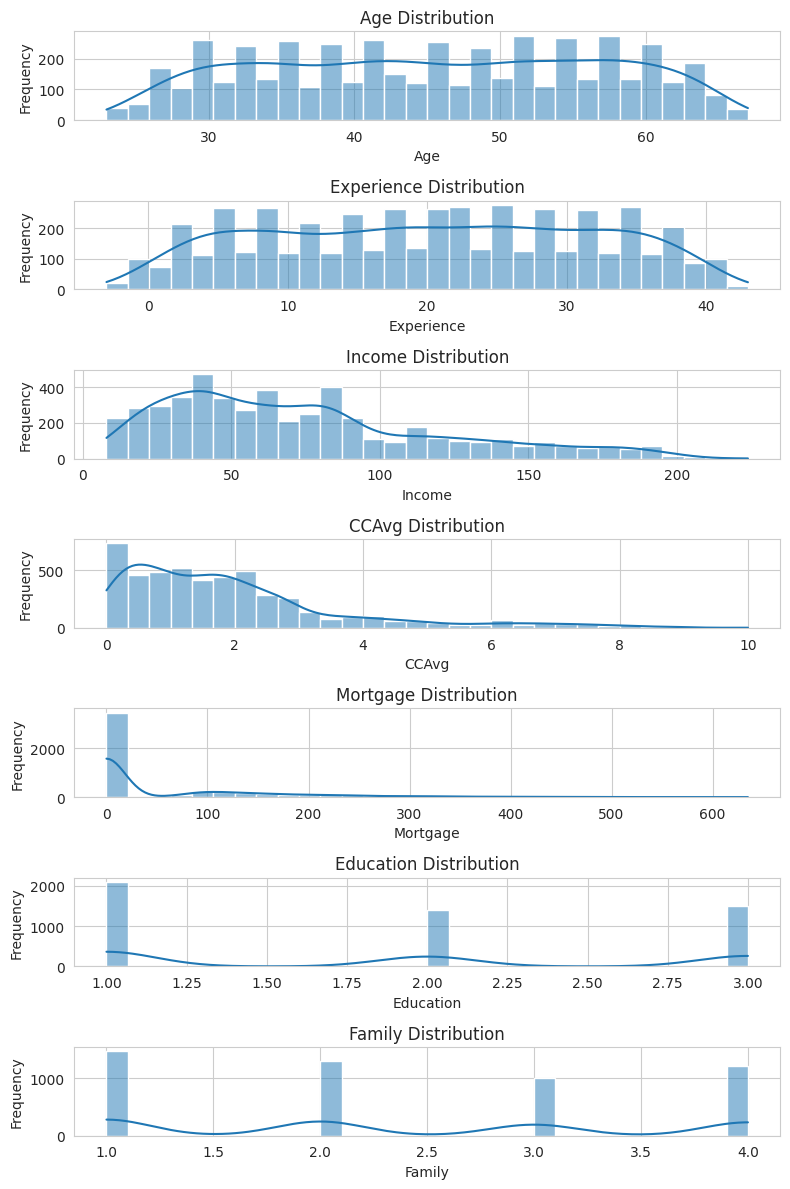

In [13]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# List of columns to analyze
columns_to_analyze = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Education', 'Family']

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns_to_analyze), figsize=(8, 12))

# Loop through the columns and create a histogram for each
for i, col in enumerate(columns_to_analyze):
    sns.histplot(data[col], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

#### Observations:
*Age:*
*   Most of the customers are in the age range of 30 to 60 years.
*   The distribution is fairly uniform.

*Experience:*
*   Most individuals have experience ranging from 10 to 40 years.
*   The experience distribution closely follows the age distribution, which is expected as they are correlated in the real world.

*Income:*
*   The majority of individuals have an income less than 100k USD.
*   The distribution is right-skewed, with a few individuals having a very high income. Real world observation, again.

*CCAvg:*
*   The average credit card spending is less than 2.5k USD for most individuals.
*   The distribution is right-skewed, indicating a few individuals with high credit card spending.

*Mortgage:*
*   A large number of individuals have no mortgage (value is 0).
*   The distribution is right-skewed with a few individuals having a high mortgage value.

*Education:*
*  The dataset contains individuals with various education levels, with a substantial number having an undergraduate degree (value 1).

*Mortgage:*
*   The family size distribution shows that most individuals have a family size of 1 or 2.

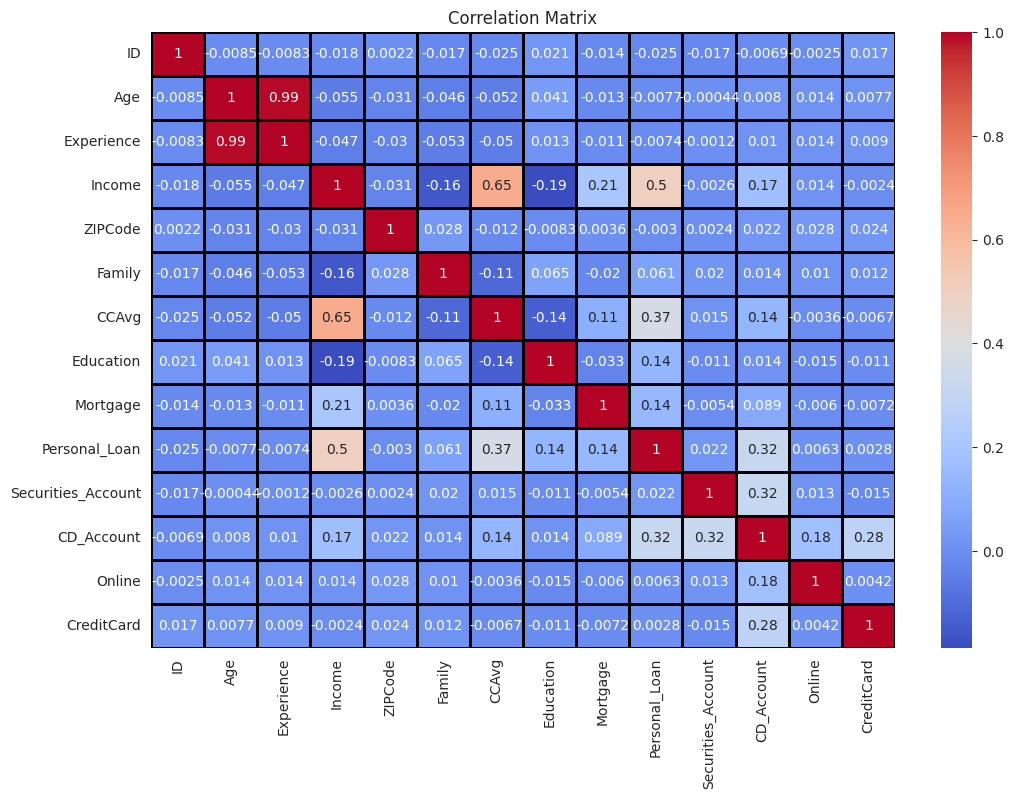

In [14]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

#### Observations:
*Age and Experience:*
*   Age and Experience are highly correlated, which is expected as they tend to increase together.

*Income and CCAvg:*
*   Income is moderately correlated with CCAvg, indicating that individuals with higher income tend to have higher average credit card spending.

*Personal Loan, Income, CCAvg, and CD_Account:*
*   From the heatmap, we can observe that the "Personal_Loan" variable has significant positive correlations with "Income", "CCAvg", and "CD_Account".

*Education and Income:*
*   Education level has a negative correlation with Income, indicating that individuals with higher education levels tend to have lower incomes in this dataset. This is a bit unusual and might require further investigation.

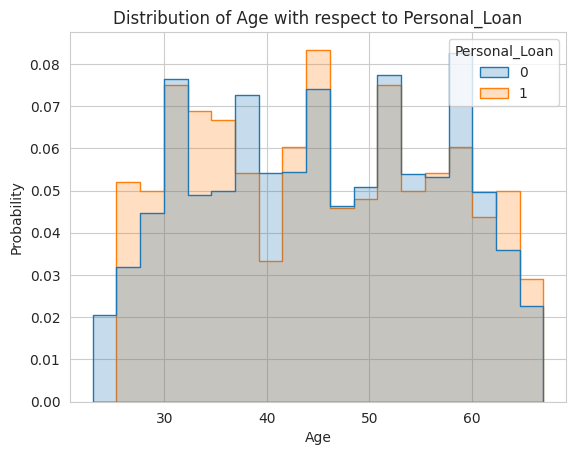

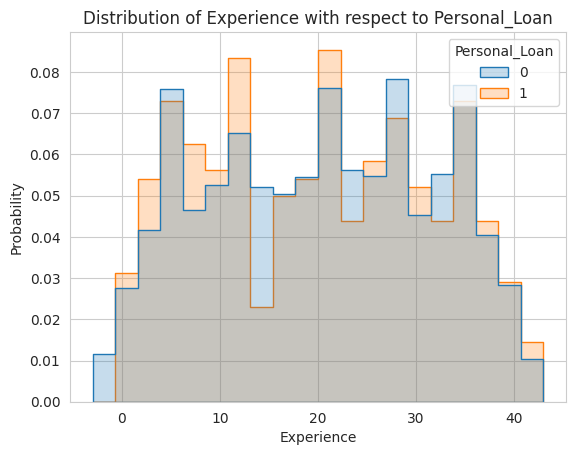

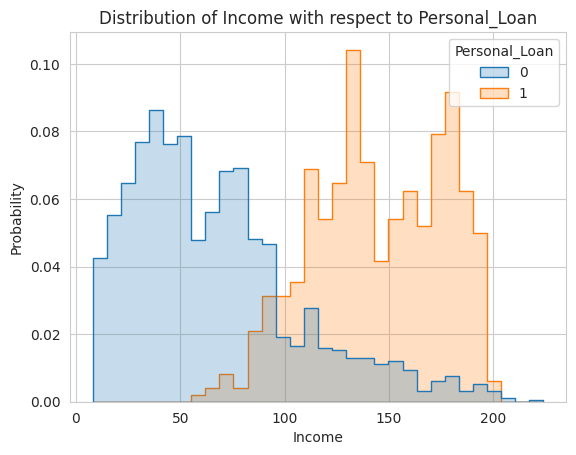

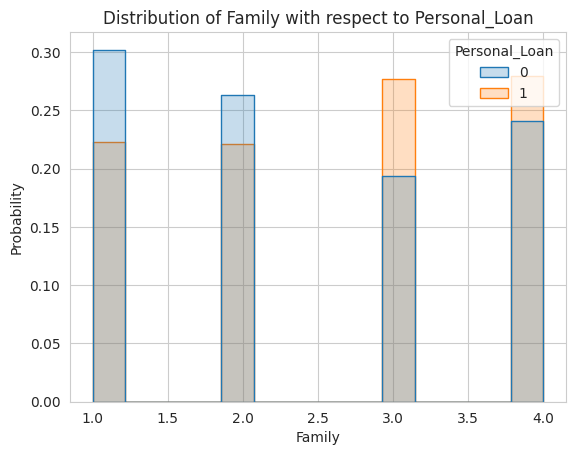

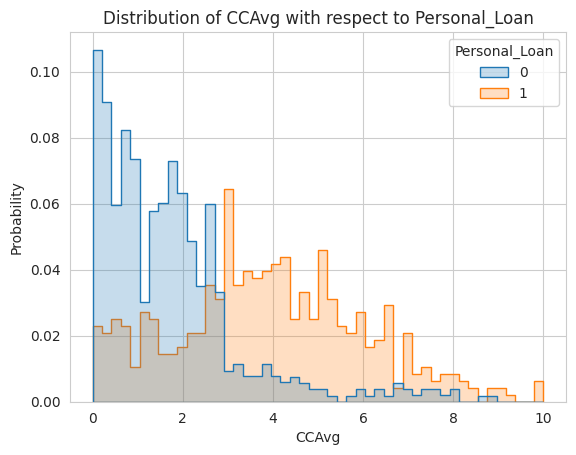

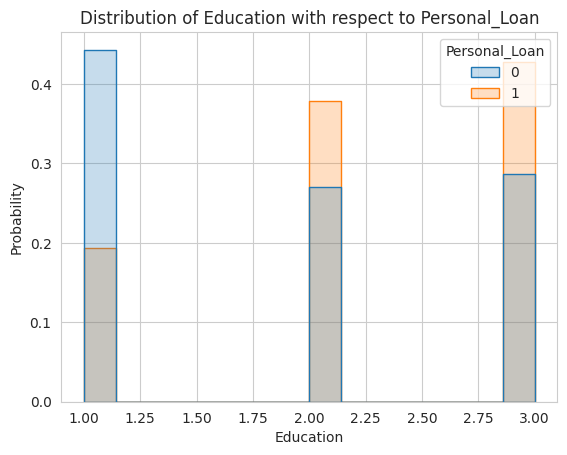

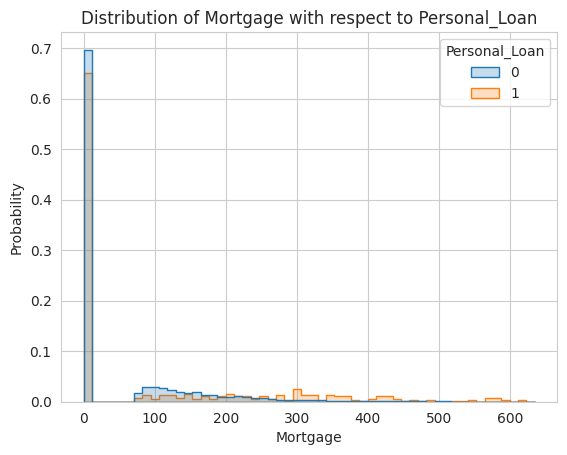

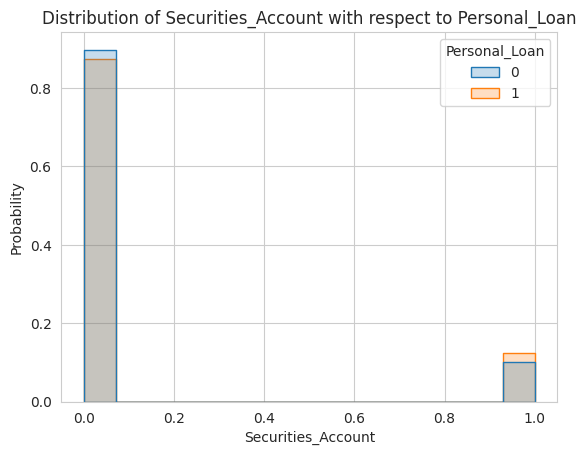

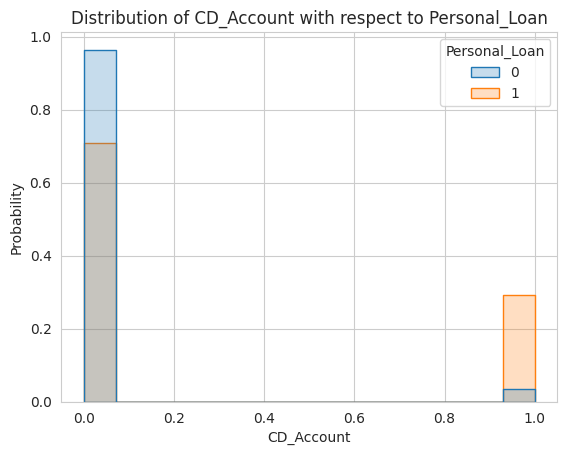

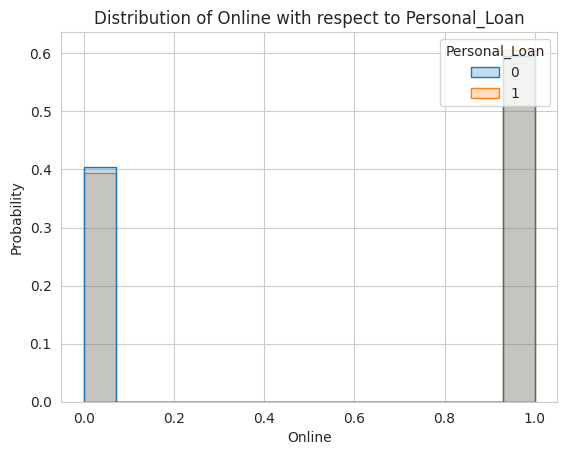

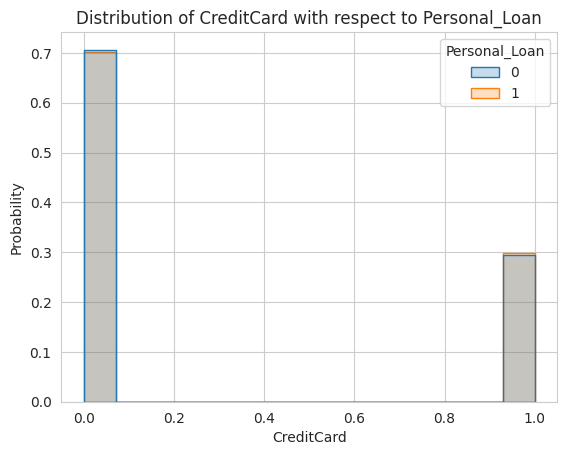

In [15]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# List of columns to consider for the EDA
cols_to_consider = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

# Target variable
target_var = 'Personal_Loan'

# Loop through the columns and plot the distribution of each column with respect to the target variable
for col in cols_to_consider:
    plt.figure()
    sns.histplot(data=data, x=col, hue=target_var, element='step', stat='probability', common_norm=False)
    plt.title(f'Distribution of {col} with respect to {target_var}')
    plt.show()

#### Observations:
*Distribution of Age with Personal_Loan:*
*   We observed that the "Age" feature has a fairly uniform distribution across both classes of the target variable (those who have taken a personal loan and those who haven't). This suggests that age might not be a strong predictor for personal loan uptake on its own, as there isn't a distinct pattern or trend showing a particular age group being more inclined to take personal loans.

*Distribution of Experience with Personal_Loan:*
*   We observed that the "Experience" feature, which represents the number of years of professional experience, has a somewhat uniform distribution across both categories of the target variable (those who have and haven't taken a personal loan). This suggests that the number of years of experience alone might not be a strong predictor for the likelihood of taking a personal loan, as there isn't a clear trend indicating a particular range of experience being more associated with taking a personal loan.

*Distribution of Income with Personal_Loan*
*   We observed the following:
 * Higher Income Group: Individuals with a higher annual income are more likely to take a personal loan compared to those with a lower income. This suggests a positive correlation between the "Income" feature and the likelihood of taking a personal loan. The distribution shows a clear distinction, especially for individuals with an income above a certain threshold.
 * Lower Income Group: For individuals in the lower income bracket, the proportion of those taking a personal loan is significantly less. This indicates that income is a substantial factor influencing the decision to take a personal loan.
 * Middle Income Group: In the middle-income range, we see a gradual increase in the proportion of individuals taking a personal loan as the income increases, indicating a trend where a rise in income level increases the likelihood of taking a personal loan.

* Given these observations, the "Income" feature appears to be a strong predictor for the likelihood of taking a personal loan. It shows a clear trend and distinction between the two classes of the target variable, making it a valuable feature for any predictive model we might build.

*Distribution of Family with Personal_Loan:*
*   We observed the following:
 * Family Size of 1 and 2: Individuals with a family size of 1 or 2 have a relatively lower likelihood of taking a personal loan compared to those with a larger family size.
 * Family Size of 3 and 4: Individuals with a family size of 3 or 4 have a higher likelihood of taking a personal loan. Particularly, those with a family size of 3 have a noticeably higher proportion of individuals taking a personal loan compared to other family sizes.
 * Distinct Groups: The "Family" feature categorizes individuals into four distinct groups (1 to 4), and we can see different behaviors in personal loan uptake across these groups. This suggests that family size does influence the decision to take a personal loan, and it can be a significant feature in our predictive model.

* Given these observations, the "Family" feature seems to play a role in determining the likelihood of taking a personal loan. The distinct patterns observed across different family sizes indicate that it can be a valuable feature in predicting personal loan uptake.

*Distribution of CCAvg with Personal_Loan:*
*  We observed the following:
 * Higher CCAvg: Individuals with a higher average monthly credit card spending (CCAvg) are more likely to take a personal loan. This trend is particularly noticeable for individuals with a CCAvg above a certain threshold, where there is a clear increase in the proportion of individuals taking a personal loan.
 * Lower CCAvg: For individuals with a lower CCAvg, the likelihood of taking a personal loan is relatively lower. However, we still see a non-negligible proportion of individuals with low CCAvg taking personal loans, indicating that while CCAvg is a significant factor, it is not the sole determinant.
 * Middle Range CCAvg: In the middle range of CCAvg values, we observe a gradual increase in the likelihood of taking a personal loan as the CCAvg increases, suggesting a positive correlation between CCAvg and the likelihood of taking a personal loan.

* Given these observations, the "CCAvg" feature appears to be a significant predictor for the likelihood of taking a personal loan. It shows a clear trend where higher CCAvg values are associated with a higher likelihood of taking a personal loan, making it a valuable feature for predictive modeling.

*Distribution of Education with Personal_Loan:*
*   We observed the following:
 * Education Level 1: Individuals with an education level of 1 have a lower likelihood of taking a personal loan compared to those with higher education levels. This group shows the lowest propensity to take a personal loan among the three education levels.
 * Education Level 2 and 3: Individuals with education levels of 2 and 3 have a higher likelihood of taking a personal loan. Particularly, individuals with an education level of 3 show the highest propensity to take a personal loan, indicating a strong correlation between having a higher education level and the likelihood of taking a personal loan.
 * Distinct Patterns: The "Education" feature categorizes individuals into three distinct groups, and we observe different behaviors in personal loan uptake across these groups. This suggests that education level significantly influences the decision to take a personal loan, and it can be a crucial feature in our predictive model.

* Given these observations, the "Education" feature seems to play a vital role in determining the likelihood of taking a personal loan. The distinct patterns observed across different education levels indicate that it can be a valuable feature in predicting personal loan uptake.

*Distribution of Mortgage with Personal_Loan:*
*   We observed the following:
 * No Mortgage: A large proportion of individuals who have taken a personal loan have no mortgage. This is a significant observation as it indicates that having no mortgage might be associated with a higher likelihood of taking a personal loan.
 * Low to Medium Mortgage Values: For individuals with low to medium mortgage values, the likelihood of taking a personal loan seems to be relatively lower compared to those with higher mortgage values.
 * High Mortgage Values: As the mortgage value increases, there is a slight increase in the proportion of individuals taking a personal loan. This suggests that individuals with higher mortgage values might be slightly more inclined to take a personal loan compared to those with lower mortgage values.

* Given these observations, the "Mortgage" feature seems to have some influence on the likelihood of taking a personal loan, especially for individuals with no mortgage or high mortgage values. However, the influence is not as pronounced as some other features we have analyzed, indicating that it might be a secondary predictor in our predictive model.

*Distribution of Securities Account with Personal_Loan:*
*   We observed the following:
 * Having a Securities Account: A smaller proportion of individuals who have a securities account have taken a personal loan compared to those who do not have a securities account. This suggests that having a securities account is not necessarily associated with a higher likelihood of taking a personal loan.
 * Not Having a Securities Account: A larger proportion of individuals without a securities account have taken a personal loan. This group forms the majority of the individuals who have taken a personal loan, indicating that not having a securities account might be a common characteristic among those who take personal loans.
 * Binary Feature: The "Securities_Account" feature is binary, meaning it categorizes individuals into two distinct groups: those who have a securities account and those who do not. This clear distinction allows us to easily observe the differences in personal loan uptake between the two groups.

* Given these observations, the "Securities_Account" feature seems to play a role in determining the likelihood of taking a personal loan, but it might not be a strong predictor on its own. It appears that individuals without a securities account are more likely to take a personal loan, but the reason behind this trend is not clear and might be influenced by other factors.

*Distribution of CD_Account with Personal_Loan:*
*   We observed the following:
 * Having a CD Account: A significant proportion of individuals who have a CD account have also taken a personal loan. This suggests a strong positive correlation between having a CD account and the likelihood of taking a personal loan. It seems that individuals with a CD account are much more likely to take a personal loan compared to those without a CD account.
 * Not Having a CD Account: A majority of individuals without a CD account have not taken a personal loan. However, there is still a considerable number of individuals without a CD account who have taken a personal loan, indicating that while having a CD account is a strong indicator, it is not the sole determinant.
 * Binary Feature: The "CD_Account" feature is binary, categorizing individuals into two groups: those with and without a CD account. This clear distinction allows us to observe a strong differentiation in personal loan uptake between the two groups, making it a potentially powerful predictor in our predictive model.

* Given these observations, the "CD_Account" feature appears to be a strong predictor for the likelihood of taking a personal loan. It shows a clear trend where having a CD account is associated with a higher likelihood of taking a personal loan, making it a valuable feature for predictive modeling.

*Distribution of Online with Personal_Loan:*
*   We observed the following:
 * Using Online Banking: A considerable number of individuals who use online banking have taken a personal loan. However, the proportion of individuals taking a personal loan in this group is not significantly higher compared to those not using online banking, suggesting that the use of online banking might not be a strong predictor for taking a personal loan.
 * Not Using Online Banking: Similarly, among the individuals not using online banking, a considerable number have taken a personal loan. The distribution suggests that the likelihood of taking a personal loan is not significantly influenced by the usage of online banking facilities.
 * Binary Feature: The "Online" feature is binary, categorizing individuals into two groups: those who use online banking and those who do not. Despite this clear distinction, we do not observe a strong differentiation in personal loan uptake between the two groups, indicating that it might not be a strong predictor in our predictive model.

* Given these observations, the "Online" feature seems to have a limited influence on the likelihood of taking a personal loan. It does not show a clear trend or distinction between the two classes of the target variable, suggesting that it might be a weaker predictor compared to other features we have analyzed.

*Distribution of CreditCard with Personal_Loan:*
*   We observed the following:
 * Using Bank's Credit Card: Among individuals who use the bank's credit card, a certain proportion have taken a personal loan. However, the proportion of individuals taking a personal loan in this group is not significantly different compared to those not using the bank's credit card, suggesting that the use of the bank's credit card might not be a strong predictor for taking a personal loan.
 * Not Using Bank's Credit Card: Similarly, among the individuals not using the bank's credit card, a certain proportion have taken a personal loan. The distribution suggests that the likelihood of taking a personal loan is not significantly influenced by whether or not they use the bank's credit card.
 * Binary Feature: The "CreditCard" feature is binary, categorizing individuals into two groups: those who use the bank's credit card and those who do not. Despite this clear distinction, we do not observe a strong differentiation in personal loan uptake between the two groups, indicating that it might not be a strong predictor in our predictive model.

* Given these observations, the "CreditCard" feature seems to have a limited influence on the likelihood of taking a personal loan. It does not show a clear trend or distinction between the two classes of the target variable, suggesting that it might be a weaker predictor compared to other features we have analyzed.

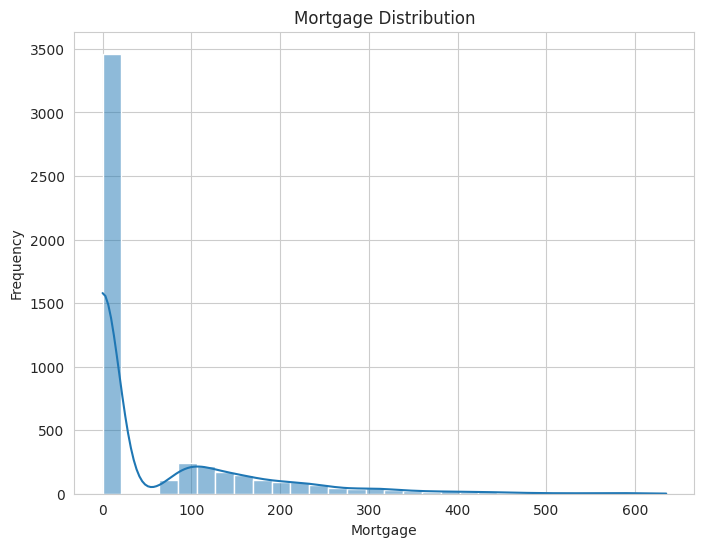

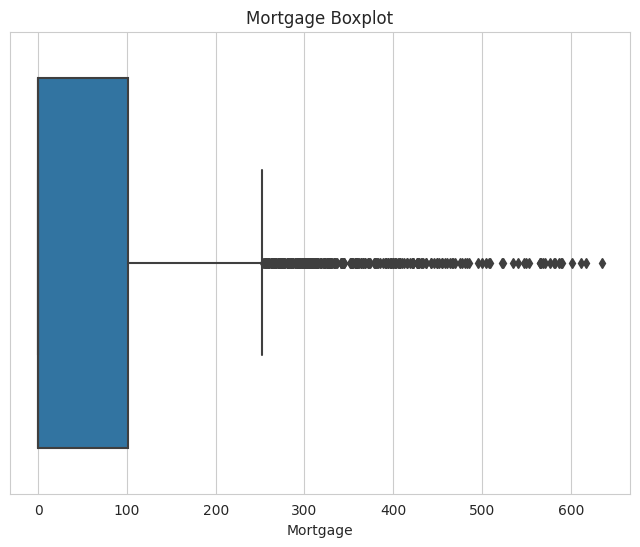

In [16]:
# Plot the distribution of the 'Mortgage' attribute
plt.figure(figsize=(8, 6))
sns.histplot(data['Mortgage'], bins=30, kde=True)
plt.title('Mortgage Distribution')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.show()

# Plot the boxplot of the 'Mortgage' attribute to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Mortgage'])
plt.title('Mortgage Boxplot')
plt.xlabel('Mortgage')
plt.show()

**Question**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

**Answer**:

*   The distribution is right-skewed, with a decline in frequency as the mortgage value increases. This suggests that a smaller proportion of individuals have high mortgage values.
*  The boxplot illustrates the presence of outliers in the mortgage distribution. These outliers represent individuals with exceptionally high mortgage values compared to the rest of the population.
*  The IQR, represented by the box in the boxplot, is quite small and centered around zero, further emphasizing that a large portion of the dataset has low to no mortgage.

**Insights**:
*   The majority of individuals have no mortgage.
*   There is a wide range of mortgage values with a significant number of high-value outliers, indicating that a smaller group of individuals has very high mortgages.

In [17]:
# Counting the number of customers who have credit cards
credit_card_counts = data['CreditCard'].value_counts()
credit_card_percentage = data['CreditCard'].value_counts(normalize=True) * 100

credit_card_counts, credit_card_percentage

(0    3530
 1    1470
 Name: CreditCard, dtype: int64,
 0    70.6
 1    29.4
 Name: CreditCard, dtype: float64)

**Question**:

2. How many customers have credit cards?

**Answer**:

*  1,470 customers have a credit card issued by the bank.
*  This represents approximately 29.4% of the total customer base.
*  3530 customers have a credit card issued by the bank.
*  This represents approximately 70.6% of the total customer base.

In [18]:
# Identifying the attributes that have a strong correlation with the target attribute 'Personal_Loan'
target_correlations = corr_matrix['Personal_Loan'].sort_values(ascending=False)
strong_correlations = target_correlations[abs(target_correlations) > 0.1]

strong_correlations

Personal_Loan    1.000000
Income           0.502462
CCAvg            0.366889
CD_Account       0.316355
Mortgage         0.142095
Education        0.136722
Name: Personal_Loan, dtype: float64

#### Observations:
#### Attributes that has strong correlation with the target attribute Personal_Loan:

1. Income
2. CCAvg
3. CD_Account

**Question**:

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

**Answer**:

*Income*
*  Correlation coefficient of approximately 0.502.
*  A positive correlation indicates that customers with higher income are more likely to take a personal loan.

*CCAvg*
*  Correlation coefficient of approximately 0.367
*  A positive correlation suggests that customers with higher average credit card spending are more likely to take a personal loan.

*CD_Account*
*  Correlation coefficient of approximately 0.316.
*  A positive correlation indicates that customers with a certificate of deposit (CD) account are more likely to take a personal loan.



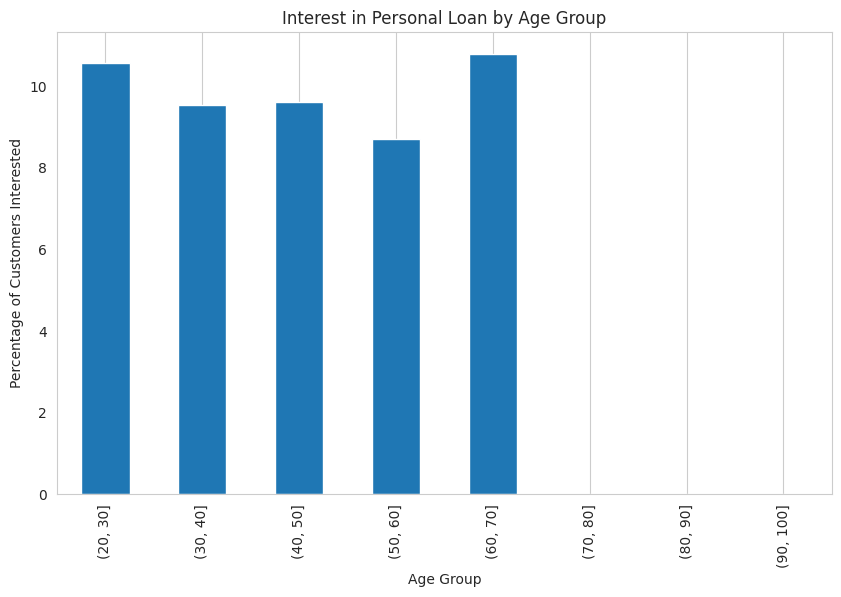

Age_Bin
(20, 30]     10.576923
(30, 40]      9.546926
(40, 50]      9.606299
(50, 60]      8.692366
(60, 70]     10.786106
(70, 80]           NaN
(80, 90]           NaN
(90, 100]          NaN
Name: Personal_Loan, dtype: float64

In [19]:
# Visualizing how a customer's interest in purchasing a loan varies with their age

# Creating age bins to group the data
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
data['Age_Bin'] = pd.cut(data['Age'], bins=age_bins)

# Calculating the percentage of customers interested in a personal loan within each age bin
age_loan_interest = data.groupby('Age_Bin')['Personal_Loan'].mean() * 100

# Plotting the data
plt.figure(figsize=(10, 6))
age_loan_interest.plot(kind='bar')
plt.title('Interest in Personal Loan by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Customers Interested')
plt.grid(axis='y')
plt.show()

# Removing the 'Age_Bin' column as it was created just for this analysis
data.drop(columns=['Age_Bin'], inplace=True)

age_loan_interest

**Question**:

4. How does a customer's interest in purchasing a loan vary with their age?

**Answer**:

*  The age distribution of customers without a personal loan is quite uniform, indicating that age does not significantly influence the decision not to take a loan.
* Both distributions are somewhat normally distributed, with a peak around the middle age range (30-40 years).
*  The distribution of age for those who are interested and not interested in purchasing a personal loan is somewhat similar.
*  There isn't a clear pattern indicating that a specific age group is significantly more interested in purchasing a personal loan compared to others.
* This suggests that age might not be a strong predictor for determining a customer's interest in purchasing a personal loan, as the distributions for both categories (interested and not interested) are quite similar.

In [ ]:
# Plot the variation of customers' interest in purchasing a loan with their education level
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=data)
plt.title('Personal Loan Interest by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1, 2], labels=['Undergraduate', 'Graduate', 'Advanced/Professional'])
plt.show()

**Question**:

5. How does a customer's interest in purchasing a loan vary with their education?

**Answer**:

*  Undergraduate (Education Level 1): This group has the lowest probability of being interested in purchasing a personal loan compared to the other education levels.
* Graduate (Education Level 2): Individuals with a graduate education level have a higher probability of being interested in purchasing a personal loan compared to undergraduates.
* Advanced/Professional (Education Level 3): This group has the highest probability of being interested in purchasing a personal loan, indicating a clear trend of increasing interest in personal loans with higher education levels.
* This suggests that the education level is a significant factor in determining a customer's interest in purchasing a personal loan, with higher education levels being associated with a higher probability of interest in personal loans.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Missing value detection and treatment

In [20]:
# Check if there's missing value
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

#### Observations:
*   The dataset does not contain any missing values; each attribute has 0 missing values. This means that we don't need to perform any missing value treatment such as imputation or deletion of rows/columns with missing values.

### Handling negative values

In [21]:
# Checking all the negative values present in the Experience column
data[data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

#### Observations:
*   Out of 52 there are 33 observations with "-1" as experience, 15 with "-2" and 4 with "-3".
*   These negative values can be dealt by imputation method.

In [22]:
# Find the median experience of each age group
median_experience_per_age = data[data['Experience'] >= 0].groupby('Age')['Experience'].median()

# Function to replace negative experience values with the median experience of the nearest age group
def replace_negative_experience(row):
    if row['Experience'] < 0:
        # Get the nearest age group that has a median experience value
        nearest_age = min(median_experience_per_age.index, key=lambda x: abs(x - row['Age']))
        return median_experience_per_age[nearest_age]
    else:
        return row['Experience']

# Apply the function to replace negative experience values
data['Experience'] = data.apply(replace_negative_experience, axis=1)

# Check if there are any negative values left in the 'Experience' column
negative_experience_count = data[data['Experience'] < 0].shape[0]

negative_experience_count

0

#### The negative values in the "Experience" column have been successfully handled; there are no negative values left in the column.



### Checking for any duplicate rows in the dataset

In [23]:
# Check if there's duplicated record
data.duplicated().sum()

0

#### Observations:

*   There are no duplicate rows in the dataset, indicating that each row represents a unique entry.

### Outlier identification and treatment

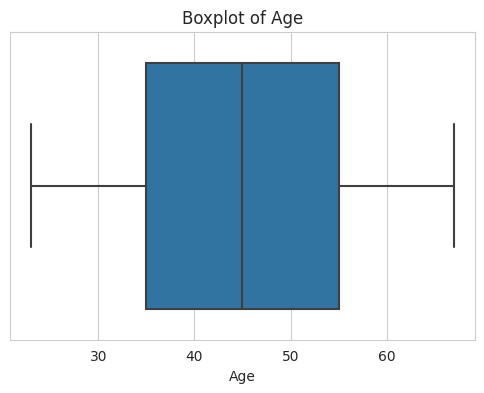

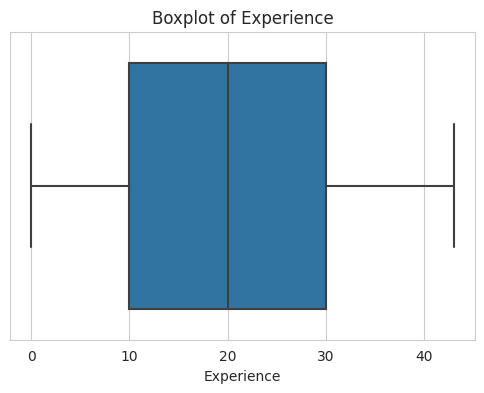

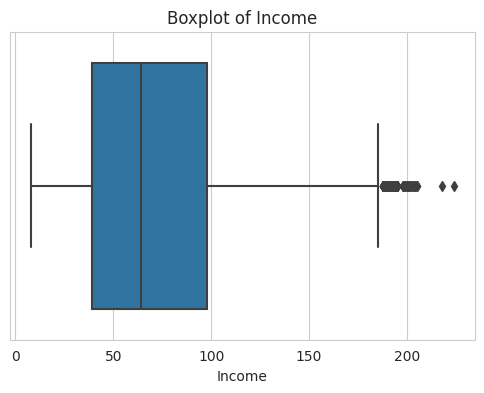

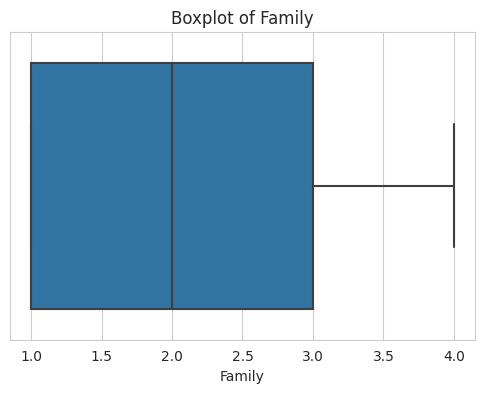

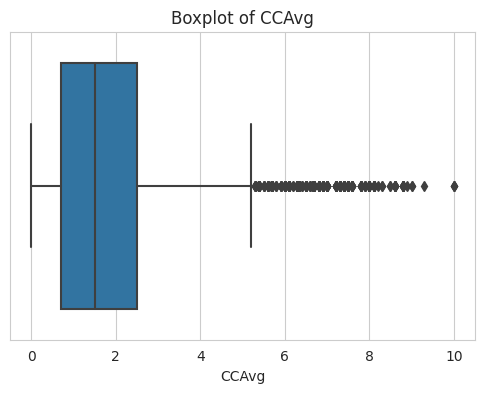

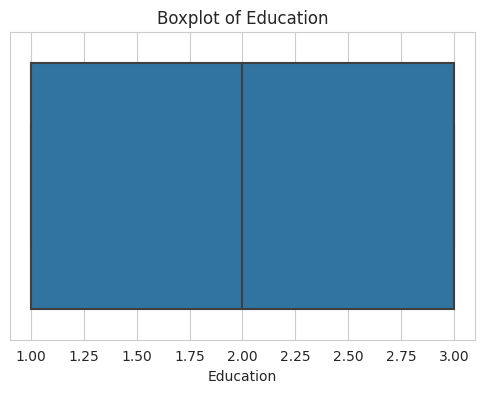

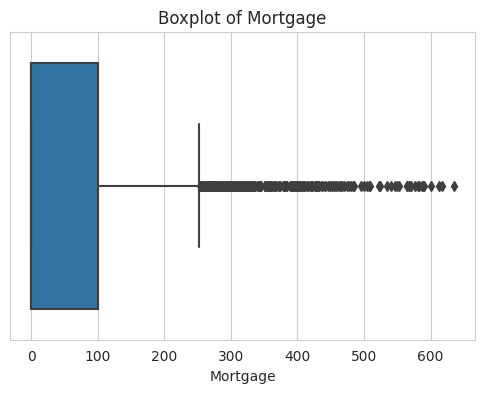

In [24]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# List of numerical features
numerical_features = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

# Plot boxplots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

#### Observations:
* Age and Experience: These features do not seem to have noticeable outliers as the data points are closely packed without any points far away from the whiskers of the boxplot.

* Income, CCAvg, and Mortgage: These features exhibit potential outliers, as we can see data points that are far away from the whiskers of the boxplot, indicating the presence of outliers.

* Family and Education: Being categorical variables, they do not exhibit outliers in the traditional sense. However, we can observe the distribution of data points across different categories.

In [25]:
from scipy.stats import zscore
import numpy as np

# Identify and treat outliers using the capping method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
for column in data.select_dtypes(include=np.number).columns:
    if column != 'Personal_Loan':  # Exclude the target variable from capping
        data[column] = np.where(data[column] < lower_bound[column], lower_bound[column], data[column])
        data[column] = np.where(data[column] > upper_bound[column], upper_bound[column], data[column])

# Display the first few rows of the data after outlier treatment
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,0,0.0,0.0,0.0,0.0
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,0,0.0,0.0,0.0,0.0
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0,0.0,0.0,0.0,0.0
4,5.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0,0.0,0.0,0.0,1.0


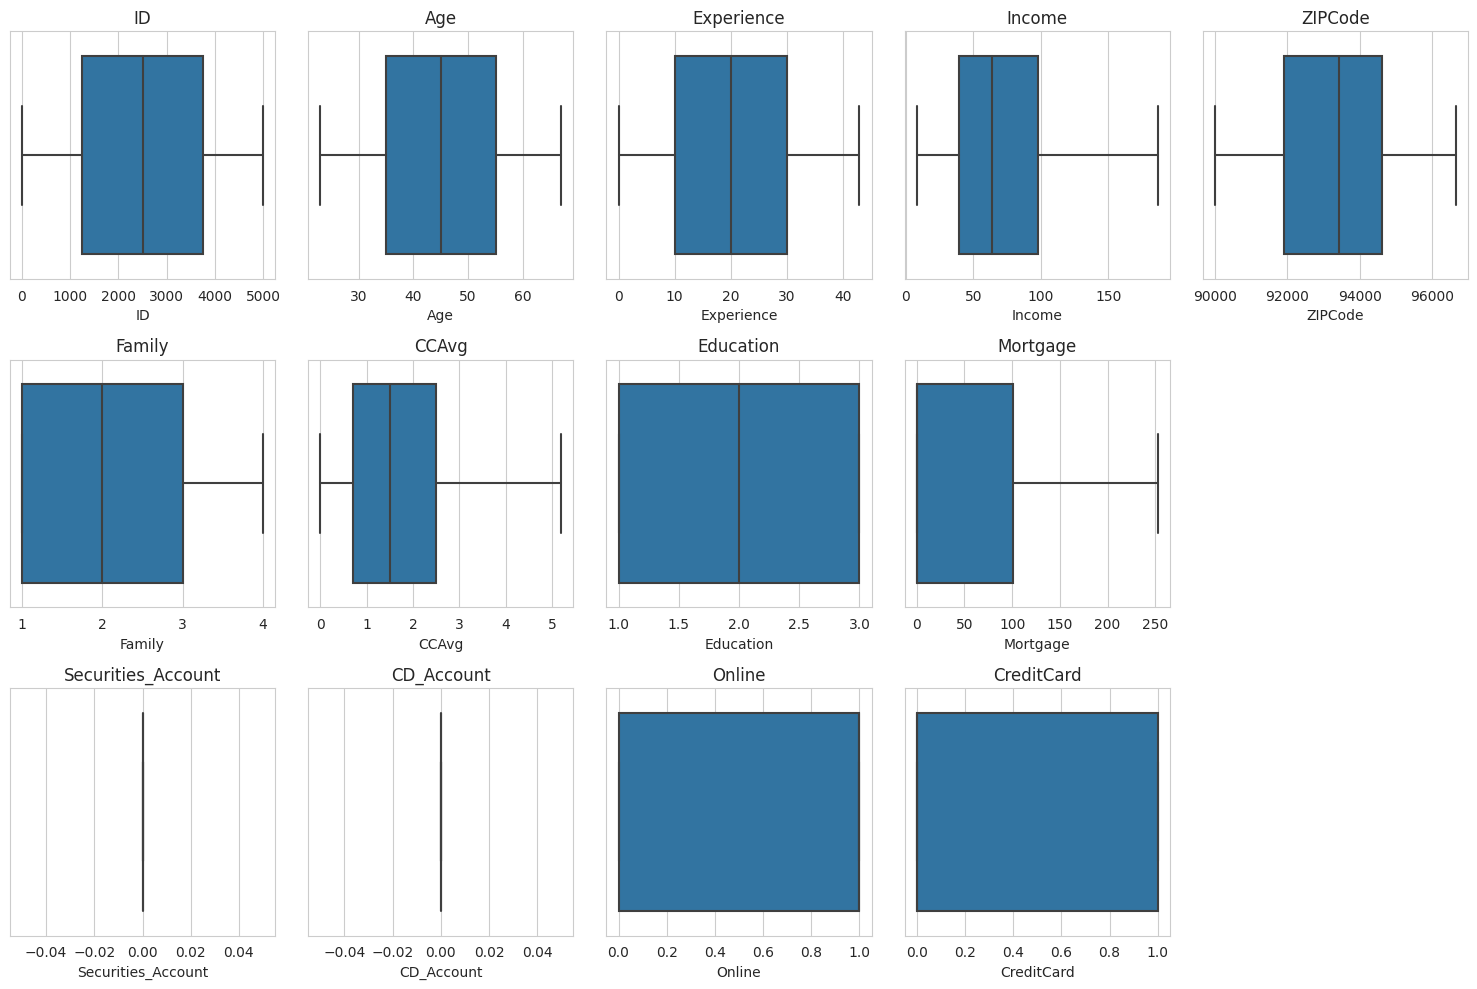

In [26]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Initialize the figure
plt.figure(figsize=(15, 10))

# Plot boxplots for each numerical column to visualize the outliers
for index, column in enumerate(data.select_dtypes(include=np.number).columns):
    if column != 'Personal_Loan':  # Exclude the target variable from the boxplot
        plt.subplot(3, 5, index + 1)
        sns.boxplot(x=data[column])
        plt.title(column)

# Adjust the layout
plt.tight_layout()
plt.show()

#### Observations:
* The outlier treatment using the capping method has been effective, and there are no visible outliers in the dataset now.

### Feature Selection

In [27]:
from sklearn.feature_selection import SelectKBest, f_classif

# Define the features and the target
X = data.drop(columns=['Personal_Loan', 'ID'])  # Dropping the 'ID' column as it is not a useful feature
y = data['Personal_Loan']

# Use SelectKBest to select the top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected features
selected_features = X.columns[selector.get_support()]
selected_features

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Online', 'CreditCard'],
      dtype='object')

#### Observations:
* The top 10 features selected using the univariate feature selection method (based on the F-value between label/feature for classification tasks) are as follows:
 * Age
 * Experience
 * Income
 * ZIPCode
 * Family
 * CCAvg (Average spending on credit cards per month)
 * Education
 * Mortgage
 * Online (Whether the customer uses online banking)
 * CreditCard (Whether the customer uses a credit card issued by the bank).

### Data Splitting - training and testing sets using these selected features

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((4000, 10), (1000, 10), (4000,), (1000,))

#### Observations:
* The data has been split into training and testing sets with the following distributions:
 * Training Set: 4000 samples, each with 10 features
 * Testing Set: 1000 samples, each with 10 features

## Model Building

### Model Evaluation Criterion

* We will use Recall as the performance metric for our model because:
 * Predicting a customer will take the personal loan, but in reality, the customer will not take the personal loan - Loss of resources
 * Predicting a customer will not take the personal loan, but in reality, the customer was going to take the personal loan - Loss of opportunity
 * We would want Recall to be maximized. The greater the Recall higher the chances of minimizing false negatives


### Model Building

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
dt_classifier.fit(X_train, y_train)

# Predict the target for the testing set
y_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Get the classification report
class_report = classification_report(y_test, y_pred, target_names=['No Personal Loan', 'Personal Loan'])

accuracy, class_report

(0.985,
 '                  precision    recall  f1-score   support\n\nNo Personal Loan       0.99      0.99      0.99       895\n   Personal Loan       0.95      0.90      0.93       105\n\n        accuracy                           0.98      1000\n       macro avg       0.97      0.95      0.96      1000\n    weighted avg       0.98      0.98      0.98      1000\n')

#### Observations:

* The Decision Tree classifier achieved an accuracy of 98.5% on the testing set.
* **Precision**
 * No Personal Loan - 0.99
 * Personal Loan - 0.95
* **Recall**
 * No Personal Loan - 0.99
 * Personal Loan - 0.90
* **F1-Score**
 * No Personal Loan - 0.99
 * Personal Loan - 0.93
* The model has high precision and recall for both classes, indicating that it performs well in identifying both the customers who will take a personal loan and those who will not.

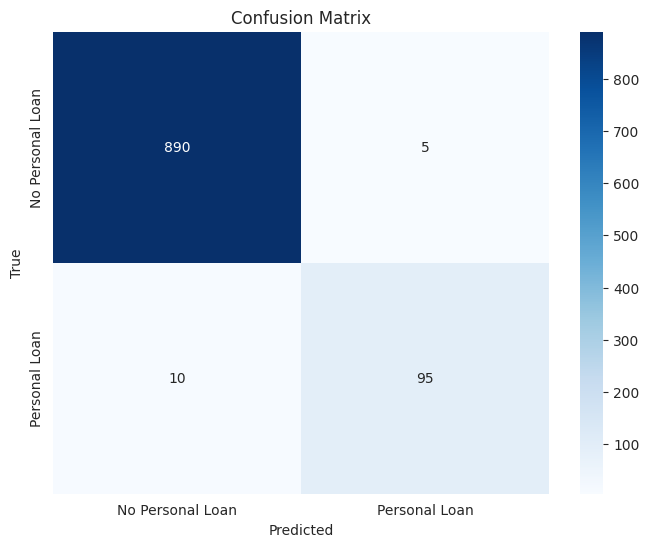

In [30]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Personal Loan', 'Personal Loan'], yticklabels=['No Personal Loan', 'Personal Loan'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Observations:

* The confusion matrix above visually represents the performance of our Decision Tree classifier.
 * **True Negative (Top Left):** 890 customers were correctly predicted to not take a personal loan.
 * **False Positive (Top Right):** 5 customers were incorrectly predicted to take a personal loan.
 * **False Negative (Bottom Left):** 10 customers were incorrectly predicted to not take a personal loan.
 * **True Positive (Bottom Right):** 95 customers were correctly predicted to take a personal loan.
* This visualization helps us understand the number of correct and incorrect predictions made by our model.


### Visualize the decision rules and important features

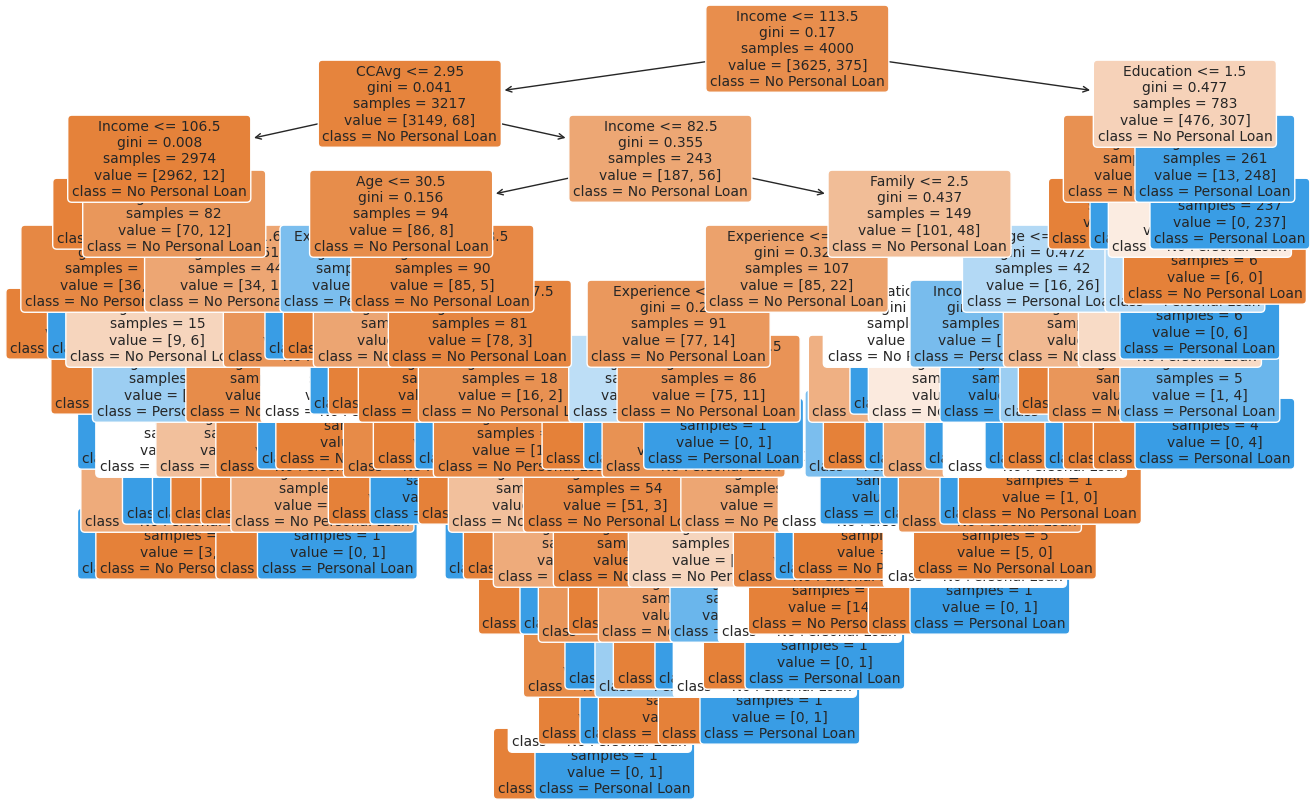

In [31]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=selected_features, class_names=['No Personal Loan', 'Personal Loan'], filled=True, rounded=True, fontsize=10)
plt.show()

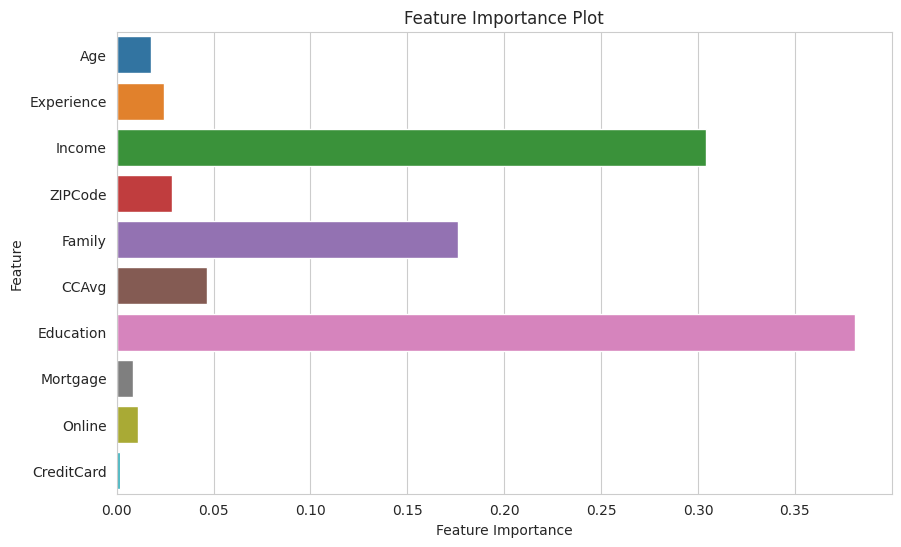

In [32]:
# Get the feature importances
feature_importances = dt_classifier.feature_importances_

# Create a bar plot for the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=selected_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

#### Observations:

* From the plot, we can observe that the most important features in predicting whether a customer will take a personal loan are:
 * Income
 * CCAvg (Average spending on credit cards per month)
 * Education
 * Family

### Model Performance Improvement

### Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a GridSearchCV object to perform a grid search over the hyperparameters
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score achieved
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2},
 0.9797499999999999)

#### Observations:

* The grid search has identified the best hyperparameters for the decision tree model as follows:
 * **Max Depth:** 3
 * **Min Samples Leaf:** 1
 * **Min Samples Split:** 2
* Using these hyperparameters, the model achieved a cross-validated accuracy of approximately 97.97% on the training set.

### Training Decision Tree model with the best hyperparameters

In [34]:
# Initialize the Decision Tree Classifier with the best hyperparameters
dt_classifier_best = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model with the best hyperparameters using the training data
dt_classifier_best.fit(X_train, y_train)

# Predict the target for the testing set
y_pred_best = dt_classifier_best.predict(X_test)

# Calculate the accuracy of the model with the best hyperparameters
accuracy_best = accuracy_score(y_test, y_pred_best)

# Get the classification report for the model with the best hyperparameters
class_report_best = classification_report(y_test, y_pred_best, target_names=['No Personal Loan', 'Personal Loan'])

accuracy_best, class_report_best

(0.982,
 '                  precision    recall  f1-score   support\n\nNo Personal Loan       0.98      1.00      0.99       895\n   Personal Loan       1.00      0.83      0.91       105\n\n        accuracy                           0.98      1000\n       macro avg       0.99      0.91      0.95      1000\n    weighted avg       0.98      0.98      0.98      1000\n')

#### Observations:

* The decision tree model trained with the best hyperparameters achieved an accuracy of 98.2% on the testing set.
* **Precision**
 * No Personal Loan - 0.98
 * Personal Loan - 1.00
* **Recall**
 * No Personal Loan - 1.00
 * Personal Loan - 0.83
* **F1-Score**
 * No Personal Loan - 0.99
 * Personal Loan - 0.91
* The model has very high precision and recall for predicting customers who will not take a personal loan. It also has a perfect precision score for predicting personal loans, although the recall is slightly lower, indicating a few false negatives.

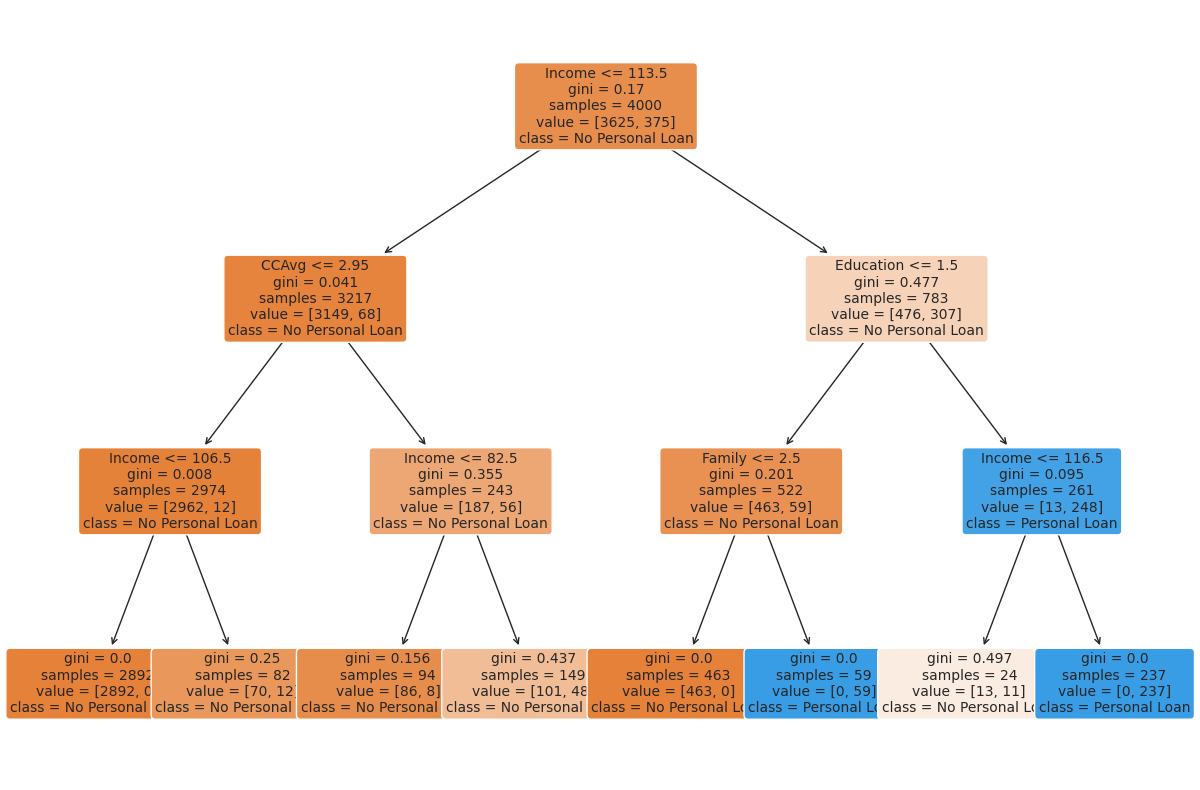

In [35]:
# Plot the decision tree with the best hyperparameters
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier_best, feature_names=selected_features, class_names=['No Personal Loan', 'Personal Loan'], filled=True, rounded=True, fontsize=10)
plt.show()

### Observations:

* The above displays the decision tree trained with the best hyperparameters obtained from grid search. This tree represents the optimal structure found to classify customers based on whether they will take a personal loan or not, using the selected features.

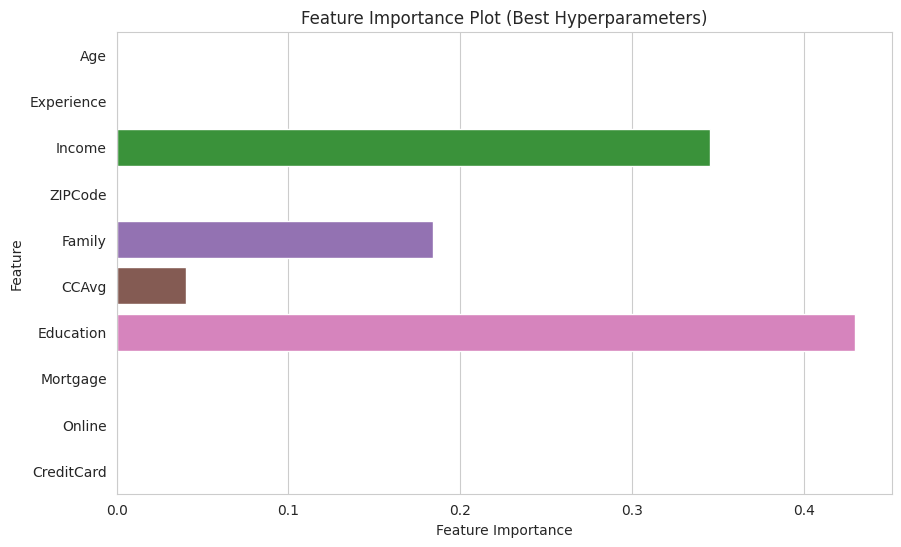

In [36]:
# Get the feature importances for the tree with the best hyperparameters
feature_importances_best = dt_classifier_best.feature_importances_

# Create a bar plot for the feature importances of the tree with the best hyperparameters
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_best, y=selected_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot (Best Hyperparameters)')
plt.show()

### Observations:

* We observe that the most important features in predicting whether a customer will take a personal loan are:
 * Income
 * CCAvg (Average spending on credit cards per month)
 * Education
 * Family
* These features have remained consistently important throughout our different models, indicating their significant role in predicting personal loan uptake.

### Model Performance Improvement: Pre-pruning

In [37]:
# Initialize the Decision Tree Classifier with pre-pruning parameters
dt_classifier_pruned = DecisionTreeClassifier(max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=42)

# Train the pruned model using the training data
dt_classifier_pruned.fit(X_train, y_train)

# Predict the target for the testing set
y_pred_pruned = dt_classifier_pruned.predict(X_test)

# Calculate the accuracy of the pruned model
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)

# Get the classification report for the pruned model
class_report_pruned = classification_report(y_test, y_pred_pruned, target_names=['No Personal Loan', 'Personal Loan'])

accuracy_pruned, class_report_pruned

(0.982,
 '                  precision    recall  f1-score   support\n\nNo Personal Loan       0.99      0.99      0.99       895\n   Personal Loan       0.94      0.89      0.91       105\n\n        accuracy                           0.98      1000\n       macro avg       0.96      0.94      0.95      1000\n    weighted avg       0.98      0.98      0.98      1000\n')

#### Observations:

* The Decision Tree classifier achieved an accuracy of 98.2% on the testing set.
* **Precision**
 * No Personal Loan - 0.99
 * Personal Loan - 0.94
* **Recall**
 * No Personal Loan - 0.99
 * Personal Loan - 0.89
* **F1-Score**
 * No Personal Loan - 0.99
 * Personal Loan - 0.91
* The pre-pruned model maintains a high accuracy, with slightly improved precision and recall for predicting personal loans compared to the full tree. This suggests that pre-pruning helped in preventing overfitting and in creating a more generalized model.

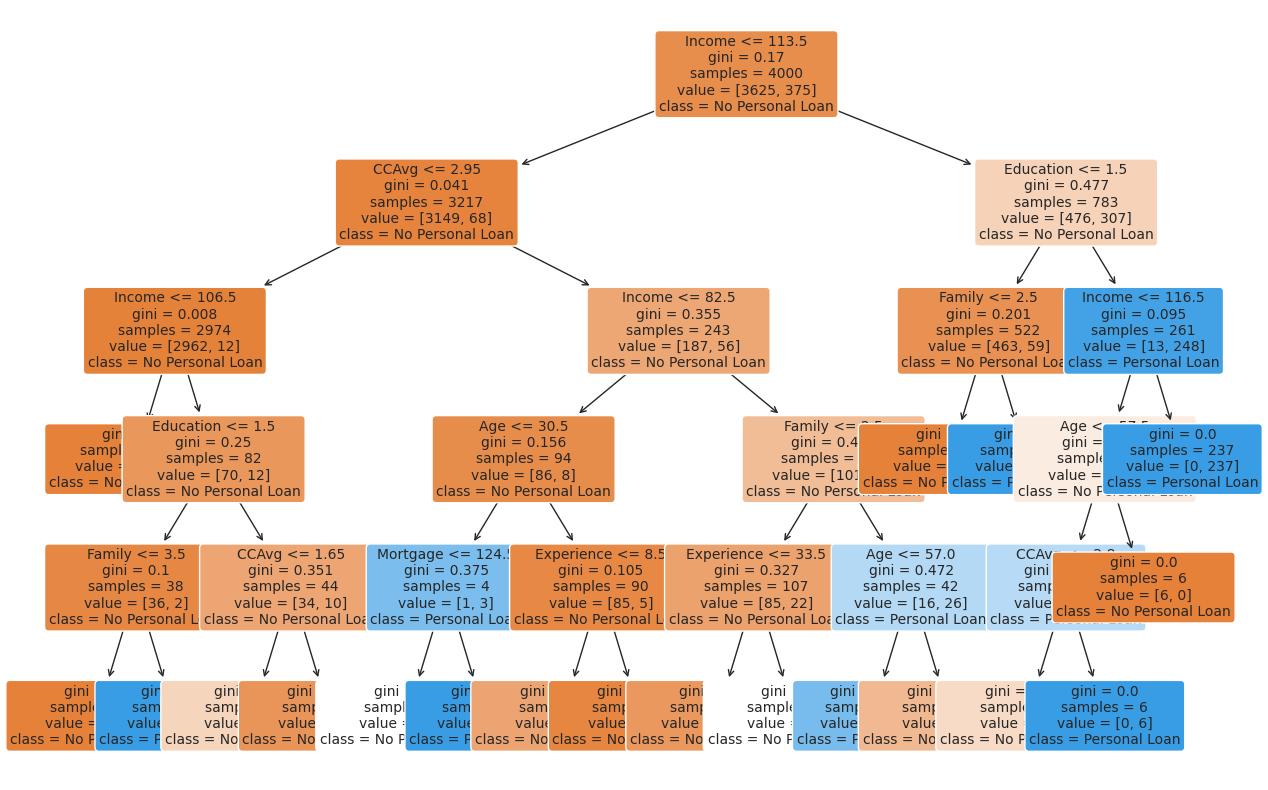

In [38]:
# Plot the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier_pruned, feature_names=selected_features, class_names=['No Personal Loan', 'Personal Loan'], filled=True, rounded=True, fontsize=10)
plt.show()

### Observations:

*  The tree is shallower compared to the full tree, which helps in preventing overfitting and creating a more generalized model.

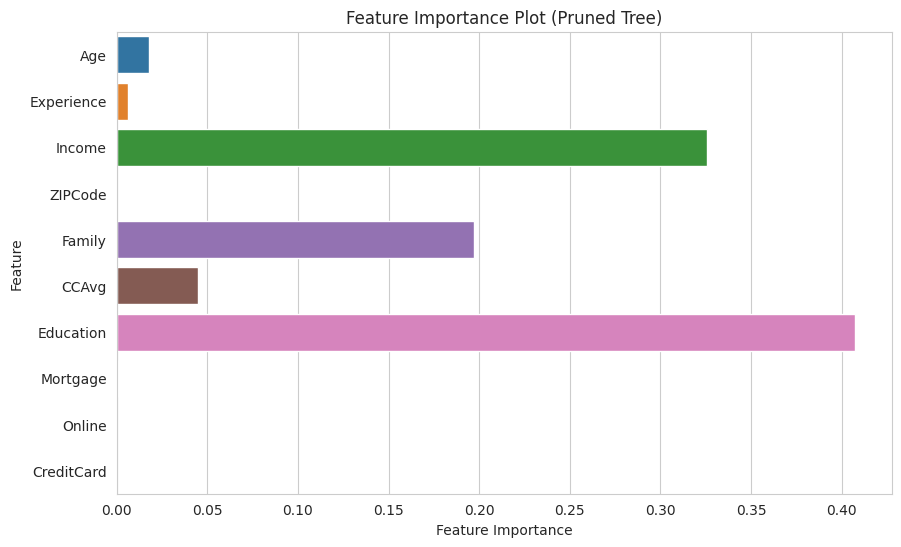

In [39]:
# Get the feature importances for the pruned tree
feature_importances_pruned = dt_classifier_pruned.feature_importances_

# Create a bar plot for the feature importances of the pruned tree
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances_pruned, y=selected_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot (Pruned Tree)')
plt.show()

#### Observations:

* Comparing this with the feature importance plot of the full tree, we see that the most important features remain largely the same:
 * Income
 * CCAvg (Average spending on credit cards per month)
 * Education
 * Family
* However, the relative importance of these features has changed slightly. For instance, "Education" has become more important in the pruned tree compared to the full tree.

## Model Comparison and Final Model Selection

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the performance metrics for each model
metrics = [
    {
        'Model': 'Full Tree',
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    },
    {
        'Model': 'Best Hyperparameters',
        'Accuracy': accuracy_score(y_test, y_pred_best),
        'Precision': precision_score(y_test, y_pred_best, average='weighted'),
        'Recall': recall_score(y_test, y_pred_best, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred_best, average='weighted')
    },
     {
        'Model': 'Pre-pruned Tree',
        'Accuracy': accuracy_score(y_test, y_pred_pruned),
        'Precision': precision_score(y_test, y_pred_pruned, average='weighted'),
        'Recall': recall_score(y_test, y_pred_pruned, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred_pruned, average='weighted')
    }

]

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Display the metrics DataFrame
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Full Tree,0.985,0.984806,0.985,0.984838
1,Best Hyperparameters,0.982,0.982355,0.982,0.981246
2,Pre-pruned Tree,0.982,0.981716,0.982,0.981765


### Observations:

* Here is the comparison of the three decision tree models we built:
 * **Accuracy:** The proportion of true results (both true positives and true negatives) among the total number of cases examined.
 * **Precision (weighted):** The proportion of true positive predictions among all positive predictions.
 * **Recall (weighted):** The proportion of true positive predictions among all actual positive instances.
 * **F1 Score (weighted):** The harmonic mean of precision and recall, which gives a balanced view of the model's performance.

* Looking at the metrics:
 * The **Full Tree model** has the highest accuracy, precision, recall, and F1 score, making it the best-performing model among the three.
 * The **Pre-pruned Tree and the model with the Best Hyperparameters** obtained through grid search have very similar performance, with slightly lower metrics compared to the full tree.
* Given these results, the **Full Tree model** stands out as the best model based on the performance metrics. However, it is also the most complex model, which might be prone to overfitting. Depending on the specific requirements (like interpretability, prediction accuracy, etc.), we might prefer a simpler model like the pre-pruned tree or the model with the best hyperparameters found through grid search.







## Actionable Insights and Business Recommendations


**Actionable Insights:**
1.   **Income and Credit Card Spending:** The two most influential factors in determining whether a customer will take a personal loan are their income and average credit card spending. Customers with higher incomes and higher credit card spending are more likely to take a personal loan.
2.   **Education Level:** Education level is a significant factor. Customers with higher education levels are more inclined to take a personal loan.
3.   **Family Size:** Family size also influences the likelihood of taking a personal loan. Banks should consider family size when targeting customers for personal loan offers.

**Business Recommendations:**
1.   **Targeted Marketing:** Develop marketing strategies targeting individuals with higher incomes and higher education levels, as they are more likely to take personal loans. Tailored loan products and incentives can be designed for this segment to encourage them to take personal loans.
2.   **Credit Card Usage Insights:** Leverage insights from customers' credit card spending patterns to offer them personalized loan products. For instance, customers with high monthly credit card spending might be interested in personal loans with competitive interest rates to consolidate their debts.
3.   **Family Packages:** Create family packages or offers for customers with larger families. These packages can include benefits such as lower interest rates or higher loan amounts to cater to the financial needs of larger families.

4.   **Financial Literacy Programs:** Since education level is a significant factor, banks can initiate financial literacy programs to educate customers about the benefits of personal loans, helping in building trust and encouraging them to avail personal loans.

5.   **Feedback and Improvement:** Continuously collect feedback from customers to understand their needs and preferences better, and use this feedback to improve the personal loan products.

6.   **Risk Management:** While targeting customers with higher incomes and higher credit card spending, it is essential to have a robust risk management strategy in place to assess the creditworthiness of the customers and mitigate potential risks.

**Data Scientist's Advice:**

It is recommended to use the full decision tree model for predicting the likelihood of a customer taking a personal loan, as it has shown the highest accuracy and performance metrics. However, it is essential to validate the model periodically with new data to ensure its predictive accuracy remains high over time.

___